In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('poster')

%matplotlib inline

Read in the [Stackoverflow Query](http://data.stackexchange.com/stackoverflow/query/211291/matlab-simulink-and-python-questions-per-month)

In [2]:
data = pd.read_csv('QueryResults.csv')

In [3]:
gd = data.pivot(index='month', columns='tag', values='count').fillna(0)

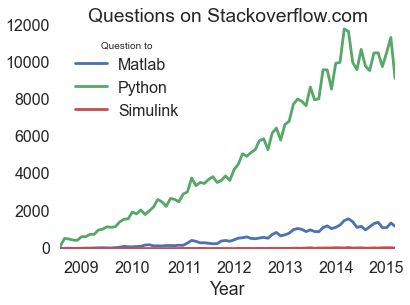

In [4]:
gd.index = pd.to_datetime(gd.index)
gd.columns.name = 'Question to'
gd.rename(columns={'python': 'Python', 'matlab': 'Matlab', 'simulink': 'Simulink'}, inplace=True)
gd.plot()

plt.title('Questions on Stackoverflow.com')
plt.xlabel('Year')
plt.savefig('stackoverflow-gesamt.png', bbox_inches='tight')
plt.savefig('stackoverflow-gesamt.eps')

In [5]:
gd['Matlab+Simulink'] = gd.Matlab+gd.Simulink

In [6]:
df = gd[['Matlab+Simulink','Python']]['01-01-2012':'01-01-2015']

#### Normalize it

In [7]:
def normalize(df, normalizer):
    '''
    Normalizes the data
    '''
    return 100.0*df.values/normalizer

In [8]:
normalizeby = df.values[0] # first value of the DataFrame
df = df.apply(normalize, args=(normalizeby,), axis=1)

#### Plot it

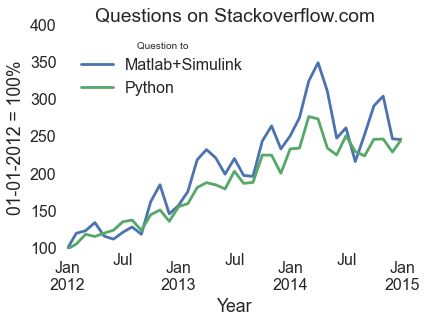

In [13]:
df.plot()
plt.ylabel('01-01-2012 = 100%')
plt.title('Questions on Stackoverflow.com')
plt.xlabel('Year')
#plt.ylim(0, 1000)
plt.savefig('stackoverflow-2009-2014.png', bbox_inches='tight')
plt.savefig('stackoverflow-2009-2014.eps')